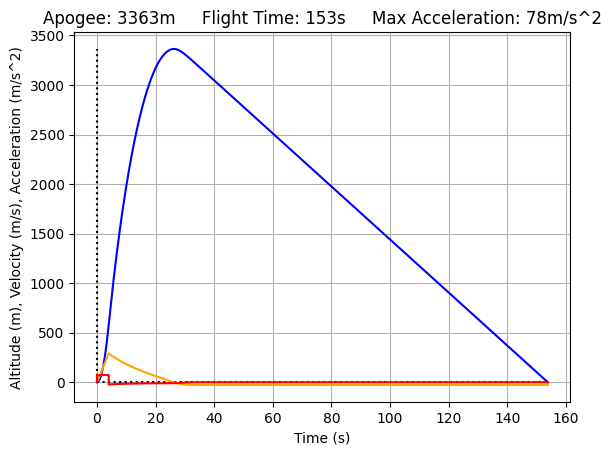

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# ------ USER INPUTS ------ #
dry_mass = 20.1 # kg
prop_mass = 4.0 # kg
thrust = 1900 # N
burn_time = 4.0 # s
cd = 0.28 # Initial C_D
area = 0.0175 # Initial area, m^2
parachute_cd = 1.5
parachute_area = 0.3048 # m^2
# ------------------------- #

alt = 0 # Altitude
vel = 0 # Velocity
acc = 0 # Acceleration
mass = dry_mass + prop_mass # Mass

tstep = 0.01 # Timestep, seconds
time = 0 # s

full_data = np.array([[alt, vel, acc]])

# Main loop; runs until the rocket hits the ground
while alt >= 0:
    # If the motor is still burning
    if time <= burn_time:
        # Set the rocket mass to the dry mass plus whatever prop mass is left
        mass = dry_mass + (prop_mass * ((burn_time - time) / burn_time))
        acc += thrust / mass
    
    # Parachute deployment at apogee
    if vel < 0:
        cd = parachute_cd
        area = parachute_area

    # Drag force = 0.5 * density of fluid * squared vel * C_D * cross sectional area
    drag = 0.5 * 1.204 * (abs(vel) * vel) * cd * area
    acc -= drag / mass
    
    # Calculating vel based on previous vel and current acc
    vel = vel + (acc * tstep)
    # Calculating alt based on previous alt and current vel
    alt = alt + (vel * tstep)

    # Adding data to numpy array
    row = np.array([[alt, vel, acc]])
    full_data = np.concatenate((full_data, row), axis=0)
    
    # Setting acceleration to gravity for next loop
    acc = -9.81
    time += tstep

# Getting the max values
max = full_data.max(axis=0)

# Plotting
x = np.arange(0, time, tstep)

plt.hlines(0, 0, time, color="k", linestyles="dotted")
plt.vlines(0, 0, max[0], color="k", linestyles="dotted")

plt.xlabel("Time (s)")
plt.plot(x, full_data[:, 0], color="b")
plt.plot(x, full_data[:, 1], color="orange")
plt.plot(x, full_data[:, 2], color="r")

plt.title(f"Apogee: {int(max[0])}m     Flight Time: {int(time)}s     Max Acceleration: {int(max[2])}m/s^2") 
plt.ylabel("Altitude (m), Velocity (m/s), Acceleration (m/s^2)")

plt.plot()
plt.grid()
plt.show()